# Machine Learning with Python

Speaker: Yingzhi Gou

Decision Systems Lab,

University of Wollongong

**NOTE** this jupyter notebook is available on github https://github.com/YingzhiGou/AI-Meetup-Decision-Systems-Lab-UOW


# Acknowledgement

source code in this tutorial is based on the book **Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems** by *Aurélien Géron*

# Understand Training

> **Training** is teaching, or developing in oneself or others, any skills and knowledge that relate to specific useful competencies. Training has specific goals of improving one's capability, capacity, productivity and performance.


* what does it mean for machine learning models?
    * normally involves to find a set of model parameters s.t. the value of a given cost/error function is minimized.
    * one example of the cost functions is Mean Square Error (MSE)


* How do we train a machine learning model?
    * by using a direct "closed-form"equation that directly computes the model parameters that best fit the model to the training examples (training set).
    * using a iterative optimization approach, called Gradient Descent, that gradually tweaks the model parameters to minimize the cost function

# Linear Regression

This model is a linear function of the input features.
Given the input $X = \langle x_1, x_2, \ldots, x_n \rangle$, the linear regression model is defined as,
$$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n $$
where 
* $\hat{y}$ is the predicted value
* $n$ is the number of features (input)
* $x_i$ is the value of the $i^{th}$ feature 
* $\theta_j$ is the $j^{th}$ model parameter
    * $\theta_0$ is the bias term
    * $\theta_1, \theta_2, \ldots, \theta_n$ are the feature weights

Also in vectorized form

$$ \hat{y} = h_{\theta}(X) = \theta^T \cdot X $$

where function $h_\theta$ commonly called hypothesis function using parameter $\theta$.

# Cost Function

Now we need a measure of how well (or poorly) the model fits the training data. 

* A common performance measure of a regression model is Root Mean Square Error (RMSE).
* the goal of the training is to minimize RMSE over training set.
* however, in practice, we simply use Mean Square Error (MSE) which is simpler to calculate.

$$ MSE(X, h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T \cdot X^{(i)} - y^{(i)}) ^2 $$

# The Normal Equation

To find $\theta$ that minimize the cost function (MSE), there is a *close-form solution* (recalled the first way of training a model). i.e. there is a mathematical equation that gives the result directly, which is called *Normal Equation*

$$ \hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

In [1]:
# prepare some data
import numpy as np

np.random.seed(42)  # only if you want reproduceable result

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

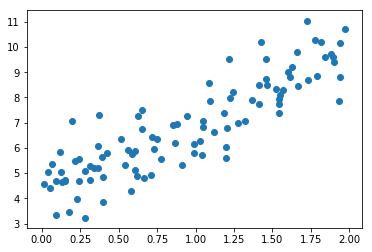

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [3]:
# calculate inverse of the matrix X using inv() function
# from NumPy's Linear Algebra module
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 for each instance (why? hint \theta_0 the bias term)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

$$ \hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

In [4]:
print(theta_best)

[[ 4.21509616]
 [ 2.77011339]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 4.21509616]
 [ 9.75532293]]


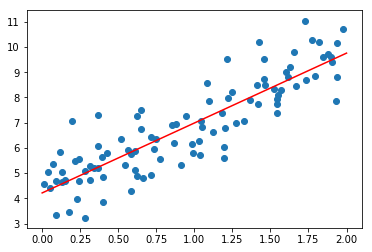

In [6]:
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")

In [7]:
# using Scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_)

[ 4.21509616] [[ 2.77011339]]


In [8]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

which is the same result.

## However ...

Normal Equation computes the inverse of $X^T \cdot X$, which is an $n\times n$ matrix (where $n$ is the number of features. The *computational complexity* of inverting such a matrix is about $O(n^{2.4})$ to $O(n^{3})$<sup>[1](#myfootnote1)</sup>.


However, again, this equation is linear with the number of training examples so it can handle large training sets efficiently, given that all the training data can fit in memory.

<a name="myfootnote1">1</a>:https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

# Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding (sometimes local) optimal solutions. 

<img src="https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0402.png" width=400\>

<img src="http://what-when-how.com/wp-content/uploads/2012/07/tmpc2f9388_thumb22.png" width=400\>

<img src="https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_learning_rate.png" width=400/>
NOTE: The notation of the diagram are different from ours

## Partial Derivatives of the Cost Function

$$ \frac{\partial}{\partial\theta_j} MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot\mathbf{x}^{(i)}-y^{(i)})x_j^{(i)} $$

## Gradient Vector of the Cost Function

$$ \nabla_{\theta} MSE(\theta) = \begin{pmatrix}
    \frac{\partial}{\partial\theta_0} MSE(\theta) \\
    \frac{\partial}{\partial\theta_1} MSE(\theta) \\
    \vdots \\
    \frac{\partial}{\partial\theta_n} MSE(\theta) \\
    \end{pmatrix} = \frac{2}{m} \textbf{X}^T\cdot(\textbf{X}\cdot\theta-\textbf{y}) $$
  

## Gradient Descent Step

$$ \theta^{(k+1)} = \theta^{(k)} - \eta \nabla_{\theta^{(k)}} MSE(\theta^{(k)}) $$

In [33]:
def plot_gradient_descent(eta, theta=None, theta_path=None, random_state=None, n_iterations=1000):
    if random_state:
        np.random.seed(random_state)
    if not theta:
        theta = np.random.randn(2,1)  # random initialization
    m = len(X_b)
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        if iteration < 10:  # only plot the first 10 iterations
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [85]:
# create temp variable to store all theta during training
theta_path_1 = []
theta_path_2 = []
theta_path_3 = []

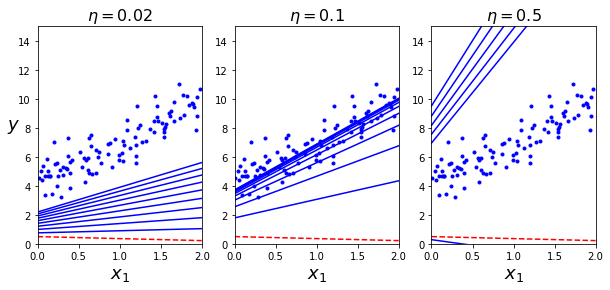

In [86]:
plt.figure(figsize=(10,4))

plt.subplot(131); plot_gradient_descent(eta=0.02, random_state=42, theta_path=theta_path_1)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(eta=0.1, random_state=42, theta_path=theta_path_2)
plt.subplot(133); plot_gradient_descent(eta=0.5, random_state=42, theta_path=theta_path_3)

plt.show()

In [104]:
# convert python list to numpy array
theta_path_1 = np.array(theta_path_1)
theta_path_2 = np.array(theta_path_2)
theta_path_3 = np.array(theta_path_3)

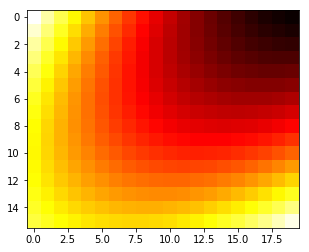

In [128]:
# simple a grad for heat map
cell_size = 0.1
theta_0s = np.arange(2.5, 4.5, cell_size)
theta_1s = np.arange(2.3, 3.9, cell_size)
m = len(X_b)
mses = [[np.mean(np.power(X_b.dot([theta_0, theta_1])-y, 2)) for theta_0 in theta_0s] for theta_1 in theta_1s]
mses = np.array(mses)
plt.imshow(mses, cmap='hot', interpolation="nearest")

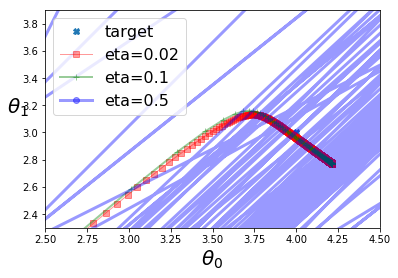

In [103]:
# let's virsulize the theta change path of different learning rate
plt.figure()
plt.plot(4, 3, "X", label="target")
plt

plt.plot(theta_path_1[:, 0], theta_path_1[:, 1], "r-s", alpha=0.4, linewidth=1, label="eta=0.02")
plt.plot(theta_path_2[:, 0], theta_path_2[:, 1], "g-+", alpha=0.4, linewidth=2, label="eta=0.1")
plt.plot(theta_path_3[:, 0], theta_path_3[:, 1], "b-o", alpha=0.4, linewidth=3, label="eta=0.5")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

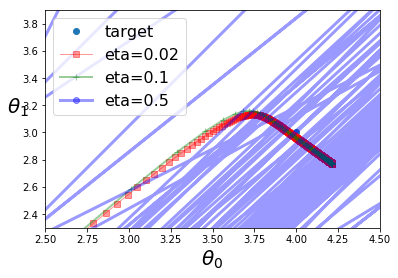

In [102]:
plt.figure()
plt.plot(4, 3, "o", label="target")
plt.plot(theta_path_1[:, 0], theta_path_1[:, 1], "r-s", alpha=0.4, linewidth=1, label="eta=0.02")
plt.plot(theta_path_2[:, 0], theta_path_2[:, 1], "g-+", alpha=0.4, linewidth=2, label="eta=0.1")
plt.plot(theta_path_3[:, 0], theta_path_3[:, 1], "b-o", alpha=0.4, linewidth=3, label="eta=0.5")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

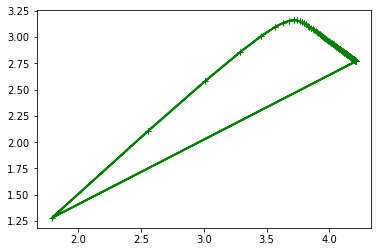

In [83]:
plt.plot(theta_path_2[:, 0], theta_path_2[:, 1], "g-+", linewidth=2, label="eta=0.1")

# Polynomial Regression

lets generate data using the following function

$$ y = \frac{1}{2} x^2 + x + 2 + \mu $$
where $ x \in [-3, 3]$ and $\mu \in [0, 1]$ is a random noise.

In [ ]:
import numpy as np

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# use linear model directly
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
plt.scatter(X, y)
plt.plot(X_new, lin_reg.predict([[-5],[5]]), "r-")

Clearly, it dose not fit.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

In [ ]:
X_poly[0]

now, X_ploy contains not only the original value, but the square of the value too.

In [ ]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

our original formula:

$$ y = \frac{1}{2} x^2 + x + 2 + \mu $$

regression model:

$$ \hat{y} = 0.56456263 x^2 + 0.93366893 x + 1.78134581 $$

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Preprocessing tool $PloynomialFeatures(degree=d)$ transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d!n!}$ features. given two features $a$ and $b$, When $degree=3$, it would not only add $a^2, a^3, b^2$ and $b^3$, but also $ab, a^2b$ and $ab^2$.

# Learning Curves



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline(
        [
            ("poly_features", poly_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg)
        ]
    )
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                     
plt.show()  

In [ ]:
from sklearn.pipeline import Pipeline
# degree 2 polynomial
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                    

In [ ]:
# degree 10 polynomial
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                    

In [ ]:
# degree 300 polynomial
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=300, include_bias=False)),
        ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                    

In [ ]:
sgd_